Name: Joshua Lindsey

Date: 6/1/2025

Project Name: Prediction of Wine Type using Deep Learning

Source: https://www.geeksforgeeks.org/prediction-of-wine-type-using-deep-learning/

In [4]:
# Step 1: Import Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [5]:
# Step 2: Loading and Preprocessing Data

# We will be loading dataset from provided url

red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

red['type'] = 1
white['type'] = 0

wines = pd.concat([red,white], ignore_index=True)
wines.dropna(inplace=True)

In [6]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


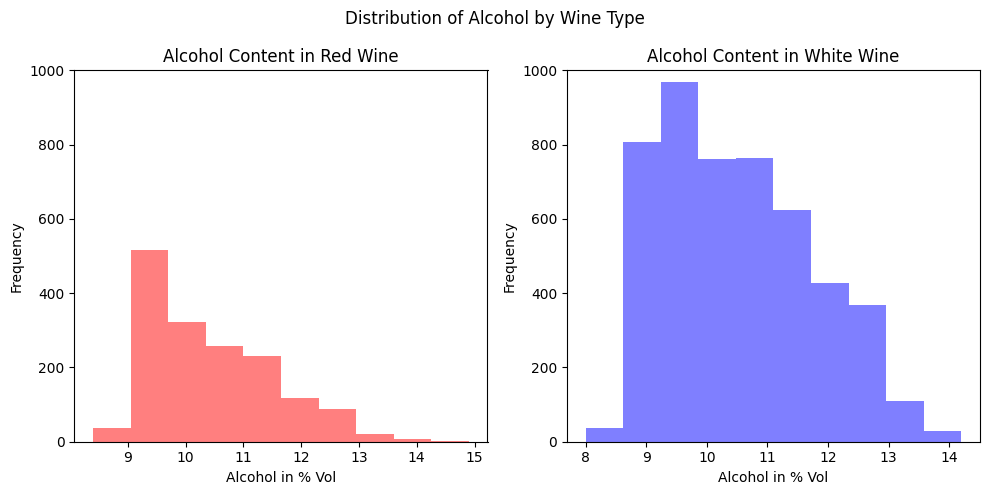

In [10]:
# Step 3: Plottingh distribution of Alcohol

fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(wines[wines['type'] == 1].alcohol, bins=10, facecolor='red', alpha=0.5, label='Red wine')
ax[1].hist(wines[wines['type'] == 0].alcohol, bins=10, facecolor='blue', alpha=0.5, label='White wine')

for a in ax:
    a.set_ylim([0,1000])
    a.set_xlabel('Alcohol in % Vol')
    a.set_ylabel('Frequency')

ax[0].set_title('Alcohol Content in Red Wine')
ax[1].set_title('Alcohol Content in White Wine')

fig.suptitle("Distribution of Alcohol by Wine Type")
plt.tight_layout()
plt.show()

In [11]:
# Step 4: Splitting Data into training and testing sets

x = wines.iloc[:,:-1]
y = wines['type']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.34, random_state=45)


In [12]:
# Step 5: Creating Neural Network Model

model = Sequential()
model.add(Dense(12, activation='relu', input_dim=12))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


c:\Users\Joshua\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Step 6: Training the model

model.fit(x_train, y_train, epochs=3, batch_size=1, verbose=1)

Epoch 1/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9138 - loss: 0.2696
Epoch 2/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9387 - loss: 0.1771
Epoch 3/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9447 - loss: 0.1652


In [14]:
# Step 7: Making Predictions

y_pred = model.predict(x_test)

y_pred_labels = (y_pred >= 0.5).astype(int)

for prediction in y_pred_labels[:12]:
    wine_type = "Red wine" if prediction == 1 else "White wine"
    print("Prediction: {}".format(wine_type))

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
Prediction: Red wine
Prediction: White wine
Prediction: Red wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
